In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

## Load and Preprocess the Data

In [7]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [8]:
trainset = datasets.FashionMNIST('dataset/', train=True, download=True, transform=preprocess)
testset = datasets.FashionMNIST('dataset/', train=False, download=True, transform=preprocess)

In [9]:
batchsize = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize, shuffle=True)

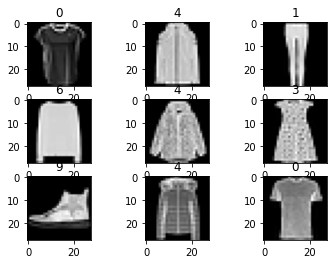

In [25]:
from matplotlib import pyplot
tx = next(iter(trainloader))
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(tx[0][i].view(28, 28, 1), cmap=pyplot.get_cmap('gray'))
    pyplot.title(str(tx[1][i].item()))
# show the figure
pyplot.show()

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

## Building the Neural Network

In [26]:
lr = 0.0001
device = "cuda" if torch.cuda.is_available() else "cpu"

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # fully connected layers
        self.linears = nn.Sequential(
            # (input vector size, number of neurons)
            nn.Linear(784, 10),
            nn.BatchNorm1d(10),
            nn.ReLU(),
            nn.Linear(10, 10),
        )

    def forward(self, x):
        x = self.linears(x)
        return x

In [37]:
model = Net().to(device)
print(model)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion_CE = nn.CrossEntropyLoss().to(device)

Net(
  (linears): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)


In [40]:
epoch = 3
model.train()
for e in range(epoch):
    print(f'Starting epoch {e} of {epoch}')
    for X, y in trainloader:
        X = X.view(X.size(0), -1)
        X = X.to(device)
        predictions = model(X) # prediction
        
        optimizer.zero_grad() # optimzer clean (remove previous gradient)
        loss = criterion_CE(predictions, y) # loss calculate
        loss.backward() # gradient calculate
        optimizer.step() # apply calculated gradient
    print(f'Loss: {loss.item()}')

torch.save(model.state_dict(), "model.pt")

Starting epoch 0 of 3
Loss: 0.7535065412521362
Starting epoch 1 of 3
Loss: 0.665305495262146
Starting epoch 2 of 3
Loss: 0.6215222477912903


In [41]:
model.eval()
correct = 0
for X, y in testloader:
    with torch.no_grad():
        X = X.view(X.size(0), -1)
        X = X.to(device)
        output = model(X)
        predictions = output.max(1)[1]
        correct += torch.eq(predictions, y).sum()

print(f'accuracy: {int(correct)}/{len(testloader.dataset)} ({int(correct)/len(testloader.dataset)} or {int(correct)/len(testloader.dataset) * 100}%)')

accuracy: 8222/10000 (0.8222 or 82.22%)
